In [11]:
#linear algebra
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 25)

In [12]:
#Plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
#importing the data .csv file and reading it into pandas dataframe
data_df = pd.read_csv('temperature.csv', index_col='Date', parse_dates=True)

In [14]:
#Splititng the Date into Year, Month and Day
data_df.reset_index(inplace=True)
data_df['Year']  = data_df['Date'].dt.year
data_df['Month'] = data_df['Date'].dt.month
data_df['Day']   = data_df['Date'].dt.day
data_df.set_index('Date', inplace=True)

In [15]:
print('Getting the info: ')
print(data_df.info())

Getting the info: 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7752 entries, 2013-06-30 to NaT
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4  

In [16]:
print('The stats of the data: ')
print(data_df.describe())

The stats of the data: 
           station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min    

In [17]:
#Get rid of the last 2 rows of the data as they don't have station and date info
data_df.drop(data_df.tail(2).index, inplace=True)


In [18]:
data_df.isnull().sum()

station              0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Year                 0
Month                0
Day                  0
dtype: int64

#looking at the  dataframe info, we can observe that all the columns can be grouped into 3 groups
#based on the no. of missing values in their respective columns. Now let's check whether if these
#missing values are at the same indices

In [19]:
#This gives the list of indices with null values
index_present_tmax= data_df['Present_Tmax'].index[data_df['Present_Tmax'].apply(np.isnan)]
index_present_tmin= data_df['Present_Tmin'].index[data_df['Present_Tmin'].apply(np.isnan)]

In [20]:
index_next_tmax   = data_df['Next_Tmax'].index[data_df['Next_Tmax'].apply(np.isnan)]
index_next_tmin   = data_df['Next_Tmin'].index[data_df['Next_Tmin'].apply(np.isnan)]

In [26]:
index_LDAPS_RHmax = data_df['LDAPS_RHmax'].index[data_df['LDAPS_RHmax'].apply(np.isnan)]
index_LDAPS_RHmin = data_df['LDAPS_RHmin'].index[data_df['LDAPS_RHmin'].apply(np.isnan)]
index_Tmax_lapse  = data_df['LDAPS_Tmax_lapse'].index[data_df['LDAPS_Tmax_lapse'].apply(np.isnan)]
index_Tmin_lapse  = data_df['LDAPS_Tmin_lapse'].index[data_df['LDAPS_Tmin_lapse'].apply(np.isnan)]
index_LDAPS_WS    = data_df['LDAPS_WS'].index[data_df['LDAPS_WS'].apply(np.isnan)]
index_LDAPS_LH    = data_df['LDAPS_LH'].index[data_df['LDAPS_LH'].apply(np.isnan)]
index_LDAPS_CC1   = data_df['LDAPS_CC1'].index[data_df['LDAPS_CC1'].apply(np.isnan)]
index_LDAPS_CC2   = data_df['LDAPS_CC2'].index[data_df['LDAPS_CC2'].apply(np.isnan)]
index_LDAPS_CC3   = data_df['LDAPS_CC3'].index[data_df['LDAPS_CC3'].apply(np.isnan)]
index_LDAPS_CC4   = data_df['LDAPS_CC4'].index[data_df['LDAPS_CC4'].apply(np.isnan)]
index_LDAPS_PPT1  = data_df['LDAPS_PPT1'].index[data_df['LDAPS_PPT1'].apply(np.isnan)]
index_LDAPS_PPT2  = data_df['LDAPS_PPT2'].index[data_df['LDAPS_PPT2'].apply(np.isnan)]
index_LDAPS_PPT3  = data_df['LDAPS_PPT3'].index[data_df['LDAPS_PPT3'].apply(np.isnan)]
index_LDAPS_PPT4  = data_df['LDAPS_PPT4'].index[data_df['LDAPS_PPT4'].apply(np.isnan)]


In [22]:
#Checking if the null values are at the same indices
if list(index_present_tmax) == list(index_present_tmin):
    print('Lists are identical')
else: print('Unidentical lists')


Lists are identical


In [24]:
if list(index_next_tmax) == list(index_next_tmin):
    print('Lists are identical')
else: print('Unidentical lists')
        

Lists are identical


In [25]:
if list(index_LDAPS_RHmax)==list(index_LDAPS_RHmin)==list(index_Tmax_lapse)==list(index_Tmin_lapse)==list(index_LDAPS_WS)==list(index_LDAPS_LH)==list(index_LDAPS_CC1)==list(index_LDAPS_CC2)==list(index_LDAPS_CC3)==list(index_LDAPS_CC4)==list(index_LDAPS_PPT1)==list(index_LDAPS_PPT2)==list(index_LDAPS_PPT3)==list(index_LDAPS_PPT4):
    print('Lists are identical')
else: print('Unidentical lists')


Lists are identical


#Hence we can see that all the missing values in thoese columns are present at the same indexes

#There are 25 stations, let's divide all the data according to the stations
#Creating 26 empty lists to store the stations data
#Note here that we need only 25 empty lists to store the data of 25 stations. But I am creating 26 lists
#and will leave the 1st list (index=0) empty, so that if I need the data for station i, I can access
#directly station[i] and get the data. This is done to avoid any confusion.

In [27]:
no_of_stations = 25
station = [[] for _ in range(no_of_stations+1)]

for i in range(1,len(station)):
    station[i] = data_df.loc[data_df['station'] == i]


In [29]:
#All the columns are of datatype float64 and since the std. deviaiton is less and the total no. of
#missing values are less, filling all the nan values with the respective column avg.
for i in range(1,len(station)):
    station[i] = station[i].fillna(station[i].mean())
    #station[i].set_index('Date', inplace=True)

In [30]:
#let's plot the geographical locations of the stations from the latitude, longitude data
#create a new dataframe to store all the latitudes and longitudes
new_data = pd.DataFrame(columns=['lat','lon'], index=range(0,25))
for i in range(0,25):
    new_data['lat'][i] = data_df['lat'][i]
    new_data['lon'][i] = data_df['lon'][i]

Text(0.5, 1.0, 'Geographical location of stations')

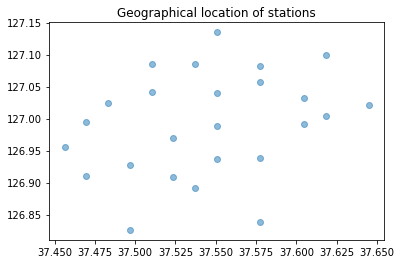

In [31]:
fig, ax = plt.subplots()
ax.scatter(new_data['lat'],new_data['lon'], alpha=0.5)
plt.title('Geographical location of stations')

In [32]:
labels = [i for i in range(1,len(station))]
for i, txt in enumerate(labels):
    ax.annotate(txt, (new_data['lat'][i],new_data['lon'][i]))


# VISULIZATION THE DATA

In [33]:
#This shows the varaition of Present Max temp at a station throughout 2013 to 2016
for i in range(1,len(station)):

    plt.rcParams.update({'font.size': 5})
    ncols = 2
    nrows = 2

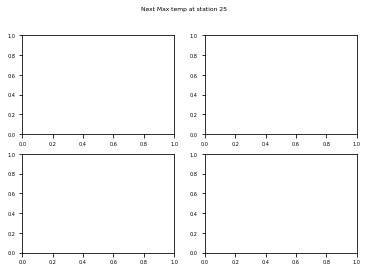

In [37]:
 fig, axes = plt.subplots(nrows=nrows, ncols=ncols)      
fig.suptitle('Next Max temp at station {}'.format(i))
 years = [2013,2014,2015,2016]

In [38]:
for ax, j in zip(axes.flatten(), years):
    ax.plot(station[i].loc[station[i]['Year']==j]['Next_Tmax'], linewidth=0.75)
    ax.title.set_text('Year {}'.format(j))

In [39]:
for ax in axes.flatten():
    ax.set_xticks([])
    ax.tick_params(axis='y', labelsize=5) 

In [41]:
#This shows the variation of Present Max temp at all stations in a particular year
years = [2013,2014,2015,2016]


In [42]:
for j in years:
    
    #plt.rcParams.update({'font.size:5'})
    ncols = 5
    nrows = 5

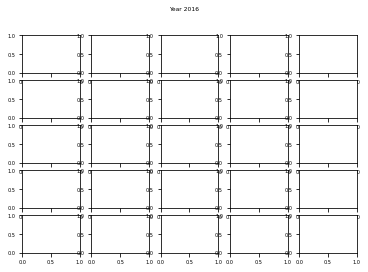

In [45]:
 fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.suptitle('Year {}'.format(j))
 i = range(1,26)

In [46]:
for ax, i in zip(axes.flatten(), i):
        ax.plot(station[i].loc[station[i]['Year']==j]['Next_Tmax'], linewidth=0.75)
        ax.title.set_text('Station {}'.format(i))

In [47]:
 for ax in axes.flatten():
        ax.set_xticks([])
        ax.tick_params(axis='y', labelsize=5)

In [48]:
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    #plt.tight_layout()

In [49]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler

#For Multivariate Linear Regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#K-Fold cross validation
from sklearn.model_selection import cross_val_score

In [50]:
def get_train_valid(station):
    
    train = station.loc[station['Year']!=2017] 
    valid = station.loc[station['Year']==2017]
    
    train = train.drop(['Date','station','lat','lon','DEM','Slope','Year','Month','Day'], axis=1)
    valid = valid.drop(['Date','station','lat','lon','DEM','Slope','Year','Month','Day'], axis=1)
    
    return train, valid

In [51]:
def scale(X_train, X_test):
    
    scaler = MinMaxScaler(feature_range=(0,1))
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test  = scaler.transform(X_test)
    
    return X_train, X_test

In [52]:
def backElimination(X, Y_train, arr, get_arr):
    
    X_opt = X[:, arr]
    regressor_OLS = sm.OLS(endog = Y_train, exog = X_opt).fit()
    results_summary = regressor_OLS.summary()


In [59]:
results_as_html = results_summary.tables[1].as_html()
dfs = pd.read_html(results_as_html, header=0, index_col=0)[0]

NameError: name 'results_summary' is not defined

In [58]:
 results_as_html = results_summary.tables[1].as_html()
dfs= pd.read_html(results_as_html, header=0, index_col=0)[0]

NameError: name 'results_summary' is not defined

In [56]:
p_value =  dfs.iloc[:, 3]
p_value_arr = p_value.tolist()
pop_item = False
maxpos  = p_value_arr.index(max(p_value_arr))
if(p_value_arr[maxpos]>sl):
    get_arr.append(arr[maxpos])
    arr.pop(maxpos)
    pop_item = True

NameError: name 'dfs' is not defined

In [60]:
data_df.isnull().sum()

station              0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Year                 0
Month                0
Day                  0
dtype: int64

In [61]:
targets  = ['Next_Tmax','Next_Tmin']
features = ['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_RHmin','LDAPS_Tmax_lapse',
            'LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3',
            'LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']

In [62]:
#let's predict the Next_Tmax and Next_Tmin for 2017 at station-1 
train = station[1].loc[station[1]['Year']!=2017]  
valid = station[1].loc[station[1]['Year']==2017]


In [63]:
train = train.drop(['Date','station','lat','lon','DEM','Slope','Year','Month','Day'], axis=1)
valid = valid.drop(['Date','station','lat','lon','DEM','Slope','Year','Month','Day'], axis=1)


KeyError: "['Date'] not found in axis"

In [64]:
X_train = train.iloc[:, :-2].values
Y_train_Tmax = train.iloc[:, [-2]].values
Y_train_Tmin = train.iloc[:, [-1]].values

In [65]:
X_test = valid.iloc[:, :-2].values
Y_test_Tmax = valid.iloc[:, [-2]].values
Y_test_Tmin = valid.iloc[:, [-1]].values

#Normalizing the data
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [67]:
#Multiple Linear Regression


regressor_max = LinearRegression()
regressor_max.fit(X_train, Y_train_Tmax)

regressor_min = LinearRegression()
regressor_min.fit(X_train, Y_train_Tmin)

LinearRegression()

In [68]:
Y_pred_Tmax  = regressor_max.predict(X_test)
Y_pred_Tmin  = regressor_min.predict(X_test)
#Y_pred_train = regressor.predict(X_train)

In [69]:
#K-fold cross validation
accuracies_max = cross_val_score(estimator = regressor_max, X = X_train, y = Y_train_Tmax, cv = 10)
acc_mean_max = accuracies_max.mean()
acc_std_max  = accuracies_max.std()

In [70]:
accuracies_min = cross_val_score(estimator = regressor_min, X = X_train, y = Y_train_Tmin, cv = 10)
acc_mean_min = accuracies_min.mean()
acc_std_min  = accuracies_min.std()


In [71]:
kfold = {'acc_mean_max':acc_mean_max, 'acc_std_max':acc_std_max,
         'acc_mean_min':acc_mean_min, 'acc_std_min':acc_std_min}

In [73]:
#Backelimination for Tmax
X_train_mul = np.append(arr = np.ones((X_train.shape[0], 1)).astype(int), values = X_train, axis = 1)
sl = 0.05
arr_max = []
get_arr_max = []
for i in range(0, X_train.shape[1]):
    arr_max.append(i)

In [74]:
def backElimination_Tmax(X, arr, get_arr):
    
    X_opt = X[:, arr]
    regressor_OLS = sm.OLS(endog = Y_train_Tmax, exog = X_opt).fit()
    results_summary = regressor_OLS.summary()

    results_as_html = results_summary.tables[1].as_html()
    dfs = pd.read_html(results_as_html, header=0, index_col=0)[0]

In [75]:
 p_value =  dfs.iloc[:, 3]
p_value_arr = p_value.tolist()
 pop_item = False
maxpos  = p_value_arr.index(max(p_value_arr))
if(p_value_arr[maxpos]>sl):
    get_arr.append(arr[maxpos])
    arr.pop(maxpos)
    pop_item = True

NameError: name 'dfs' is not defined

In [76]:
ummary_max = backElimination_Tmax(X_train_mul, arr_max, get_arr_max)

acc_max = round(regressor_max.score(X_train, Y_train_Tmax)*100, 2)


#Backelimination for Tmin
X_train_mul = np.append(arr = np.ones((X_train.shape[0], 1)).astype(int), values = X_train, axis = 1)
sl = 0.05
arr_min = []
get_arr_min = []
for i in range(0, X_train.shape[1]):
    arr_min.append(i)

In [89]:
def backElimination_Tmin(X, arr, get_arr):
    
    X_opt = X[:, arr]
    regressor_OLS = sm.OLS(endog = Y_train_Tmin, exog = X_opt).fit()
    results_summary = regressor_OLS.summary()

    results_as_html = results_summary.tables[1].as_html()
    dfs = pd.read_csv('temperature.csv', header=0, index_col=0)[0]

In [91]:
p_value =  dfs.iloc[:, 3]
p_value_arr = p_value.tolist()
pop_item = False
maxpos  = p_value_arr.index(max(p_value_arr))
if(p_value_arr[maxpos]>sl):
    get_arr.append(arr[maxpos])
    arr.pop(maxpos)
    pop_item = True
    
    if(pop_item): return backElimination_Tmax(X, arr, get_arr)
    else: 
        get_arr.sort()
        return results_summary      

NameError: name 'dfs' is not defined

In [81]:
summary_min = backElimination_Tmin(X_train_mul, arr_min, get_arr_min)

acc_min = round(regressor_min.score(X_train, Y_train_Tmin)*100, 2)


In [82]:
#Accuracies for Tmax and Tmin
acc = {'Tmax accuarcy':acc_max, 'Tmin_accuracy':acc_min}


In [83]:
Y_pred_Tmax = pd.DataFrame(Y_pred_Tmax)
Y_pred_Tmin = pd.DataFrame(Y_pred_Tmin)

In [84]:
Y_pred_Tmax.columns = ['Predicted Next_Tmax']
Y_pred_Tmin.columns = ['Predicted Next_Tmin']


In [85]:
Y_pred = pd.concat([Y_pred_Tmax, Y_pred_Tmin], axis=1, join='inner')
test = valid
test.index = [i for i in range(0,len(test))]

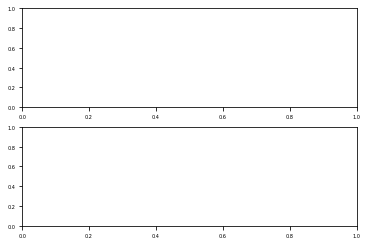

In [86]:
#plotting the results
nrows = 2
ncols = 1
fig, (ax1,ax2) = plt.subplots(nrows=nrows, ncols=ncols)

In [87]:
ax1.plot(test['Next_Tmax'], label='True value')
ax1.plot(Y_pred['Predicted Next_Tmax'], label='Predicted')
ax1.title.set_text('Tmax - True v/s Predicted')
ax1.set_xticks([])
ax1.tick_params(axis='y', labelsize=5)
ax1.legend(loc='upper right')


In [88]:
ax2.plot(test['Next_Tmin'], label='True value')
ax2.plot(Y_pred['Predicted Next_Tmin'], label='Predicted')
ax2.title.set_text('Tmin - True v/s Predicted')
ax2.set_xticks([])
ax2.tick_params(axis='y', labelsize=5)
ax2.legend(loc='upper right')